In [1]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy as np
import matplotlib as mpl
from scipy import stats


from scipy.interpolate import interp1d
import pandas as pd



Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Create file for fitting DNN

In [2]:
#[sim_g_E,sim_g_I,np.log10(sim_beta),
#np.log10(sim_CV_K),np.log10(sim_sigma_Lambda_over_Lambda),np.log10(sim_J),])
#param_min=[ 3. ,   2. ,  -1. ,  -3.52 ,-1. ,  -5.  ]
#param_max=[10.  ,  9.49,  1.  , -0.52 , 1.  , -2.3 ]

In [4]:
# Fixed J and CVopto

In [6]:
Possible_idx_species=[0,1]
Possible_log10_CVopto=np.linspace(-1,1,20)
Possible_log10_J=np.linspace(-5,-2.5,20)
nRep=101

            
count=0;
for idx_species in [0,1]:
    for idx_S in range(len(Possible_log10_CVopto)):
        log10_CVopto=Possible_log10_CVopto[idx_S]
        for idx_J in range(len(Possible_log10_J)):
            log10_J=Possible_log10_J[idx_J]
            data=np.ones((1,4));
            data[:,0]=idx_species
            data[:,1]=log10_CVopto
            data[:,2]=log10_J
            data[:,3]=nRep

            if count==0:
                DATA=data;
            if count>0:
                DATA=np.vstack((DATA,data));
            count=count+1

len(DATA)

df = pd.DataFrame(DATA,columns=['idx_species','log10_CVopto','log10_J','nRep'])
file_name='simulation_param.txt'
df.to_csv(file_name, sep='\t')

In [3]:
# Fixed gs

In [4]:
Possible_idx_species=[0,1]
possible_g_E=np.linspace(3,10,20)

            
count=0;
for idx_species in [0,1]:
    for idx_g_E in range(len(possible_g_E)):
        g_E=possible_g_E[idx_g_E];
        possible_g_I=np.arange(2,g_E,np.diff(possible_g_E)[0])
        for idx_g_I in range(len(possible_g_I)):
            g_I=possible_g_I[idx_g_I];

            data=np.ones((1,4));
            data[:,0]=idx_species
            data[:,1]=g_E
            data[:,2]=g_I
            data[:,3]=nRep

            if count==0:
                DATA=data;
            if count>0:
                DATA=np.vstack((DATA,data));
            count=count+1

print(len(DATA))

df = pd.DataFrame(DATA,columns=['idx_species','g_E','g_I','nRep'])
file_name='simulation_param.txt'
df.to_csv(file_name, sep='\t')

500


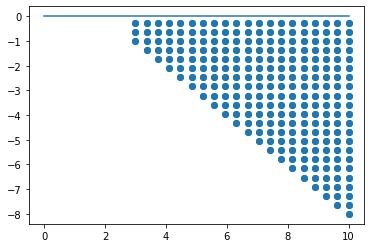

In [5]:
plt.scatter(DATA[:,1],DATA[:,2]-DATA[:,1])
xxx=np.linspace(0,10,100)
plt.plot(xxx,xxx-xxx)

In [16]:
np.max(DATA[:,2]-DATA[:,1])

-0.2631578947368425